# Wigner crystal temperature calculation

In [1]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
import numpy
import pickle
import numpy as np
from scipy import *
from scipy.constants import *
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.ticker
from scipy import optimize
from scipy.optimize import curve_fit

import re

# Создаем форматер
formatter = matplotlib.ticker.ScalarFormatter ()
formatter.set_powerlimits((-3, 1))
hfont = {'fontname':'Arial'}

from ipywidgets import IntProgress
from IPython.display import display
import time

In [24]:
def electron_density(Voltage,distance):
    return (Voltage/2/np.pi/4.8/10**(-10)/300/(distance/10))
def transition_temperature(density, Gamma_factor):
    return ((4.8*10**(-10))**2*np.sqrt(np.pi*density)/1.38/10**(-16)/Gamma_factor)

In [25]:
transition_temperature(electron_density(Voltage,distance),Gamma_factor)

0.16921887144713738

In [26]:
Voltage = 10                    #in [Volts]
distance = 2                    #in [mm]
print ('Maximum possible electron density: ', round(electron_density(Voltage,distance)/10**7, 3), '* 10^7 [cm^2]')
Gamma_factor = 130
print ('Wigner crystal transition temperature: ', round(transition_temperature(electron_density(Voltage,distance),Gamma_factor), 3), '[K]')

Maximum possible electron density:  5.526 * 10^7 [cm^2]
Wigner crystal transition temperature:  0.169 [K]


In [34]:
voltages = np.linspace(1,20, 1000)  
distance = 2 
Gamma_factor = 130
temps = transition_temperature(electron_density(voltages,distance),Gamma_factor)

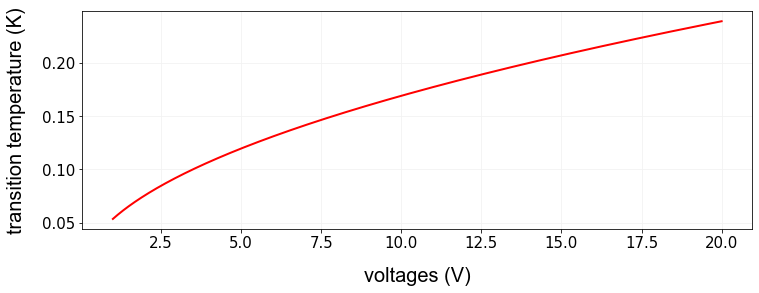

In [35]:
fig, axes = plt.subplots(1,1,figsize=(12, 4))

p = axes.plot(voltages, temps, linewidth=2.0, c = 'r', label='temperature')

#axes.axis('tight')
axes.tick_params(axis='x', labelsize=15)
axes.tick_params(axis='y', labelsize=15)
axes.set_xlabel(r'voltages (V)', labelpad=16, fontsize=20, **hfont)
axes.set_ylabel(r'transition temperature (K)', labelpad=16, fontsize=20, **hfont)
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')